In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [4]:
df_netflix = pd.read_csv('netflix_titles.csv')
df_netflixCustomer = pd.read_csv('netflix_customer_churn.csv')


### Purpose is to practice Exploratory Data Analysis along with data cleaning, manipulating and wrangling on my own. Additionally learning how to be strategic business wise and ask problem-solving questions. 

In [5]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df_netflixCustomer.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [7]:
df_netflix.shape # 8807 rows and 12 columns

(8807, 12)

In [8]:
df_netflixCustomer.shape # 5000 rows and 14 columns

(5000, 14)

In [9]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# lets access some columns to understand more our data and also about user preferencences 
df_netflix['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [11]:
# I can only see Movie and TV Show in the type -- types of entertainment media on Netflix 
# Lets do a simple count using value counts method
df_netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

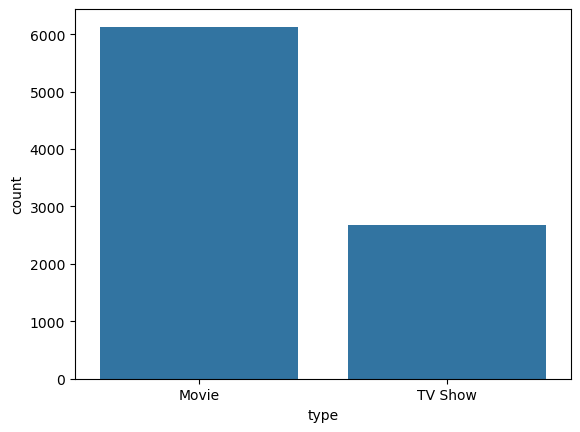

In [12]:
# Interesting info from value counts -- people are preferring Movie compared to TV Show
# Lets graph it and then do some percentage analysis
sb.barplot(df_netflix['type'].value_counts())

In [13]:
# Percentage analysis 
Movie_pref = 6131
TV_Show = 2676
Total_Content = Movie_pref + TV_Show

MoviePercent = Movie_pref * 100/ Total_Content
TvShow_Percent = TV_Show * 100/ Total_Content




In [14]:
print(MoviePercent)
print(TvShow_Percent)

69.61507891449983
30.38492108550017


In [15]:
# Percentage Analysis of Type of Entertainment media preferred on Netflix
Entertainment_Type = [MoviePercent, TvShow_Percent]


<Axes: >

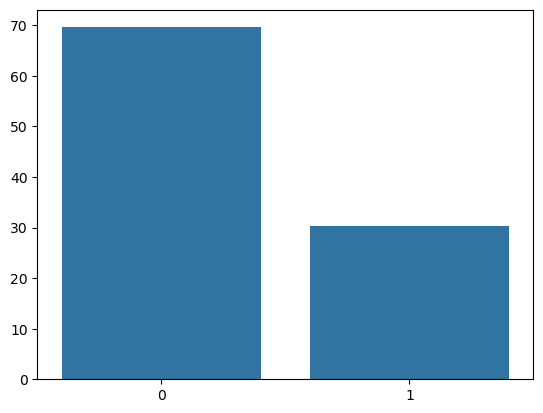

In [16]:
sb.barplot(Entertainment_Type)

In [ ]:
# Interesting this is showing how many films each director has directed 
df_netflix['director'].value_counts() # altogether 4528 directors

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [54]:

# lets do this : 1. lets see how many directors who have director 5 or more movies  
Top_directors = df_netflix['director'].value_counts()>=5


#### Reminder to me : Figuring out relationship between different variables such as most directed shows and their duration or their rating or country or listed in (documentary, mystery, drama, international tv ).

In [ ]:
# Wow so basically Only 92 out of 4528  Directors who have directed in 5 or more movies -- most of the directors are amateur 
Top_directors.value_counts()

count
False    4436
True       92
Name: count, dtype: int64

In [57]:
# Lets do simple percentage analysis of directors with experience and amateur directors 
four_or_less_m_directors = 4436
five_or_more_m_directors = 92
Total_directors = 4528

four_or_less_percent = 4436*100/4528
five_or_more_percent = 92*100/4528



In [60]:
four_or_less_percent


97.96819787985866

In [61]:
five_or_more_percent

2.0318021201413425

<Axes: >

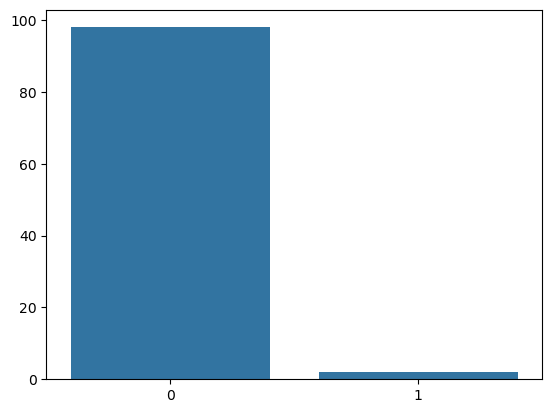

In [62]:
directors_experience = [four_or_less_percent, five_or_more_percent]
sb.barplot(directors_experience)

In [ ]:
df_netflix['country'].value_counts().head(5) # Wow US, India, UK, Japan and South Korea top five countries producing
# netflix shows 

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

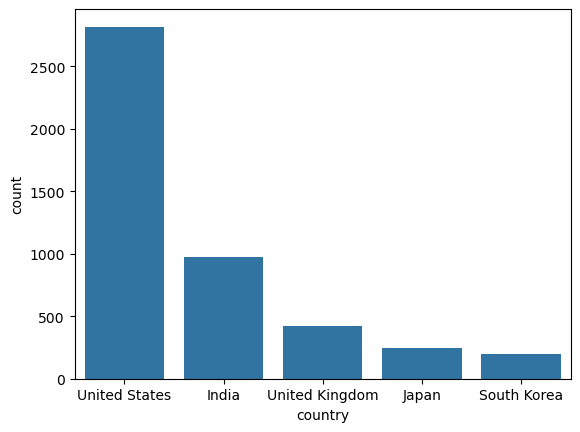

In [91]:
sb.barplot(df_netflix['country'].value_counts().head(5))

In [92]:
# lets make a filter of movies title and its description 
df_netflix[['title', 'description']]

,title,description
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,In a city of coaching centers known to train I...
...,...,...
8802,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,Zombieland,Looking to survive in a world taken over by zo...
8805,Zoom,"Dragged from civilian life, a former superhero..."


In [93]:
# lets try to basically make a dictionary where key is title name and value is its description
title_desc_dict = {"df_netflix['title']" : "df_netflix['description']"}

In [94]:
print(title_desc_dict['df_netflix[\'title\']'])

df_netflix['description']
